## Introduction to Data Science

## The CRISP-DM approach to Data Science Tasks

_________________________

## I. Business Understanding
                    
#### The Business Understanding phase focuses on understanding the objectives and requirements of the project.  
+ Determine business objectives:  

Visualizar o impacto do peso, altura, idade, país e histórico dos atletas nos resultados das Olimpíadas de Verão ao longo dos anos, bem como, com esses dados, predizer os vencedores dos Jogos Olímpicos Tóquio 2020 de um dado esporte.

+ Assess situation:  

Como as Olimpíadas é um dos eventos de esportes mais importantes e mais antigos do mundo (na Era Moderna, existe desde 1896), muito dinheiro é investido em patrocínio, treinos e até mesmo apostas, logo é de interesse usar a enorme quantidade de dados disponíveis para tentar encontrar um padrão no sucesso.

+ Determine data mining goals:  

Coletar dados sobre os atletas e confederações, dentre os dados que pretendemos utilizar estão idade, peso, altura, NOC, eventos nos quais participou, ano, quantidade de medalhas e a medalha obtida na edição em questão, que é nossa variável _target_.

+ Produce project plan:  
    + Coletar os dados dos medalhistas e quadro de medalhas da olimpíada de 2020;
    + Criar uma base de dados SQLite e normalizar os dados;
    + Gerar visualizações e explorar os dados do dataset gerado;
    + Utilizar regressões para gerar previsões de vitória;



In [1]:
import pandas as pd

## II. Data Understanding  

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

### a. Collect initial data:  

In [5]:
df = pd.read_csv('data/athlete_events.csv')

### b. Describe Data

In [6]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
df.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [22]:
# Quantidade de NOC's (NaN incluso)
len(df['NOC'].unique())

230

In [21]:
# Quantidade de atletas distintos (NaN incluso)
len(df['Name'].unique())

134732

In [23]:
# Quantidade de esportes distintos
len(df['Sport'].unique())

66

In [26]:
# Quantidade de modalidades distintas
len(df['Event'].unique())

765

### Explore Data

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

#### Peso vs. Altura

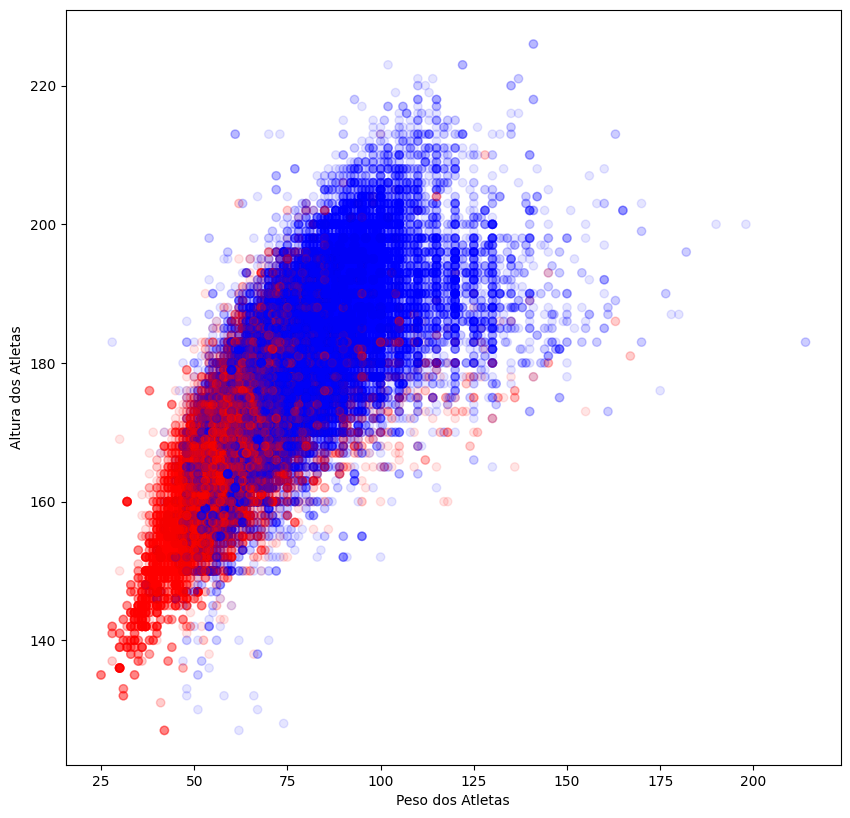

In [76]:
colors = {'M':'blue', 'F':'red'}
plt.scatter(y = df['Height'], x = df['Weight'], alpha = 0.1, c=df['Sex'].map(colors))
# sns.jointplot(df['Height'], df['Weight'])

plt.ylabel('Altura dos Atletas')
plt.xlabel('Peso dos Atletas')
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})
plt.show()

In [75]:
plt.clf()
df[df['Weight'] > 200]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN


<Figure size 1000x1000 with 0 Axes>

In [ ]:
# quantidade de ouros


## III. Data Preparation

+ Select data:   
+ Clean data:   
+ Construct data/transform data/feature engineering:   
Dados a serem calculados: (apenas um rascunho para o trabalho futuro)
    + quantidade de medalhas de cada país
    + quantidade de medalhas para cada atleta
    + quantas olimpíadas que cada atleta participou
+ Integrate data:   
+ (Re) Format data:   

## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 